- Supprt Vector Machines (SVMs) is a powerful and flexible class of supervised algorithm for 
classification and regression.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

- In Bayesian classfication we learned a simple model to probabilistically determine the labels for new points.
- That was an example of `generative classification`
- Here we will work on `discriminative classification`
- Instead of modeling each class, we simply fins a line or curve (in two dimensions) or manifold (in multidimensions)
that divide the classes from each other

- Let's consider an example of a simple classification task where the points of two classes are well separated.

## Simple data for classification

In [2]:
from sklearn.datasets import make_blobs

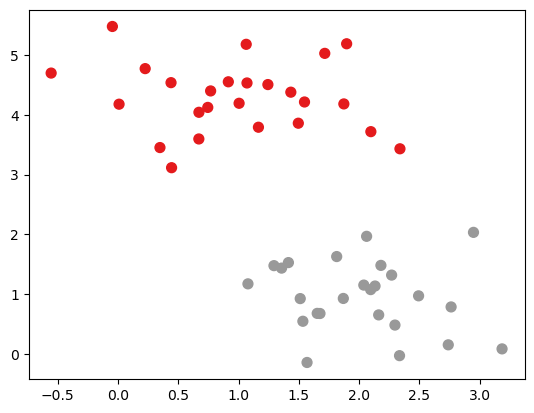

In [3]:
X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.60)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='Set1') # ValueError: 'autum' is not a valid value for name
# for more details of color combination 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

- A linear discriminative classifier would draw a straight line separating the two sets of data, and create a 
classification model.
- For two dimensional data the dtask can be done by hand but the problem is there is more than one possible dividing 
line that can discriminate between two classes!

- Let's draw them

(-1.0, 3.5)

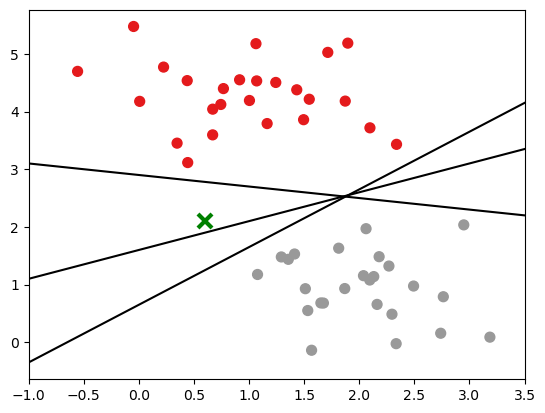

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1], c = y, s=50, cmap='Set1')
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=3, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
plt.xlim(-1, 3.5)

- The above three lines perfectly discriminate between these samples.
- Depending on the line you choose, a new data point (X in green mark) will be assigned a different label

- Drawing a line is not just enough and we need to think a bit deeper

# Support Vector Machines: Maximizing the Margin

- To improve upon zero-width line between classes, we can use Support Vector Machines
- Means drawing a margin around each line of some width upto the nearest point.

- Let's see an example

(-1.0, 3.5)

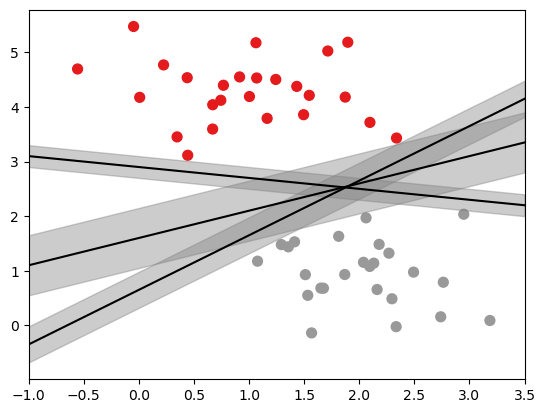

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='Set1')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = 'gray', alpha = 0.4)
    
plt.xlim(-1, 3.5)

- In Support vector machines, the line that maximizes this margin i sthe one we choose as the optimal model.
- Support vector machines are an example of such a `maximum margin estimator`

## Fitting a Support Vector Machine

- Let's see the actual fit to this data
- We will use support vector machine classifier to train an SVM model on this data.
- Using linear kernel and a very large value of C parameter

In [6]:
from sklearn.svm import SVC # support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### SVM decision boundaries 

- Let's see whats happening here by visualizing the SVM boundary decision

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors = 'k',
               levels = [-1, 0, 1], alpha=0.5,
               linestyles = ['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s = 300, linewidth = 1, facecolors = 'none')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

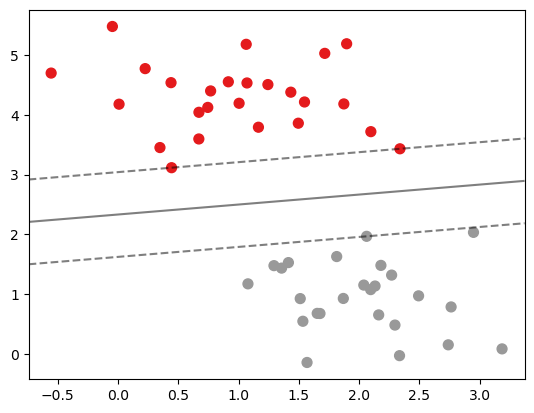

In [10]:
plt.scatter(X[:,0], X[:,1], c = y, s=50, cmap='Set1')
plot_svc_decision_function(model)

- The dividing line maximizes the margins between two sets of points.
- Few of the training points touches the margins.
- These are the pivotal elements of this fit and are known as `support vectors`.
- The identity of these points are stored in support_vectors_ attribute of the classifier.

- The fit of this classifier is based on the positions of these support vectors and any points further from the margin
on the correct side do not modify the fit.
- Because other than support vectors, they don't contribute to the loss function

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- Next Let's plot the model learned fromt he first 60 points and first 120 points of this dataset

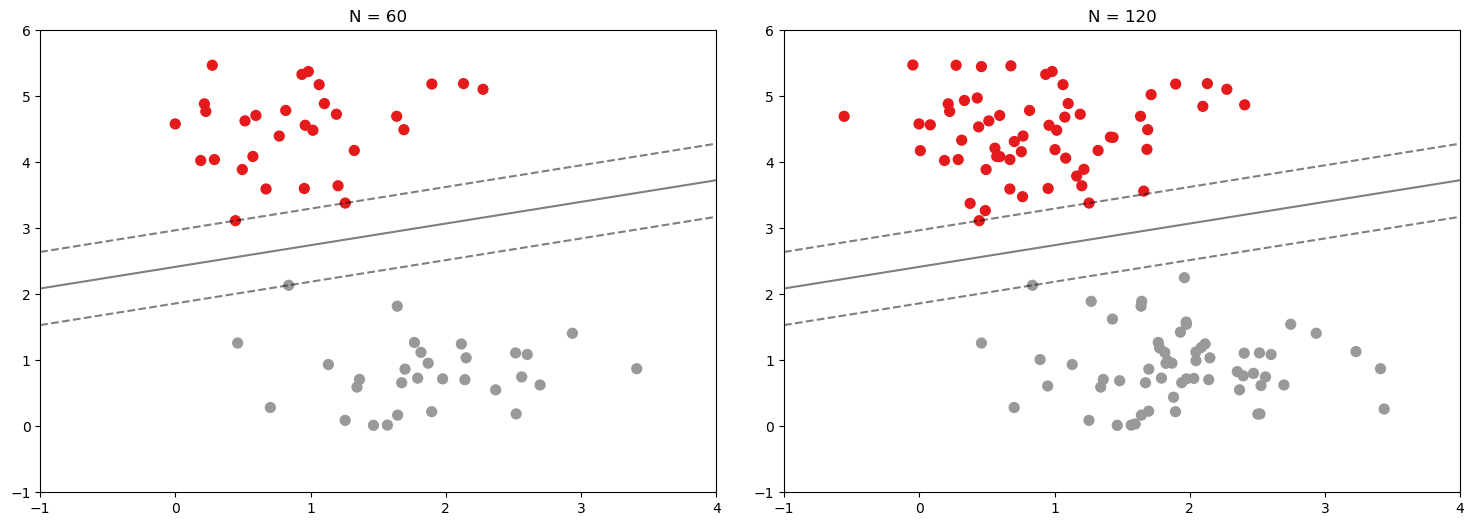

In [11]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- Even after changing the training points the support vectors of the left panel are still the same in the right panel and doesn't change

In [13]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 150, 200], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 50, 150, 200), value=10), Output()), _dom_classes…

<function __main__.plot_svm(N=10, ax=None)>

## Beyond linear boundaries: Kernel SVM

- SVM becomes powerful when it combines with Kernels. 
- Using kernels we can fit for nonlinear relationships with a linear classifier.

- Let's take a look at some data which is not linearly separable

In [16]:
from sklearn.datasets import make_circles

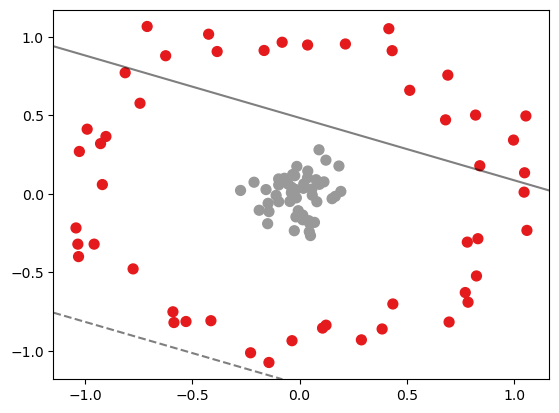

In [41]:
X, y  = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')
plot_svc_decision_function(clf, plot_support=False)

- A linear classifier performs poorly for nonlinear boundaries

- How about projecting the data into a higher dimension such that a linear separator would be sufficient?
- This can be done by computing the *radial basis function* centered on the middle clump

In [33]:
r = np.exp(-X ** 2 ).sum(1)

- We can visualize the data by using three-dimensional plot

In [37]:
from mpl_toolkits import mplot3d

def plot_3D(elev=180, azim=180, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0], X[:,1], r, c=y, s=50, cmap='Set1')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-180, 180], azip=(-180, 180),
        X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=1, options=(-180, 180), value=180), IntSlider(value=1…

<function __main__.plot_3D(elev=180, azim=180, X=array([[ 3.78585628,  1.96688602],
       [ 1.1372926 ,  0.54740762],
       [-0.02596621,  4.92577961],
       [ 0.26604148,  2.71915015],
       [ 3.00569136,  1.15121775],
       [ 1.34880003,  3.07479238],
       [ 1.01287689,  4.15404025],
       [ 3.59362114,  2.08207549],
       [ 0.66640862,  4.06194513],
       [ 1.41253979,  0.34602384],
       [ 0.69794036,  4.4288665 ],
       [ 1.75992205,  0.70616032],
       [ 1.14289006,  5.08509856],
       [ 0.25043139,  4.34534364],
       [ 1.84086482,  1.53962878],
       [ 3.96178334,  1.65324725],
       [ 2.95657626,  0.03371845],
       [ 0.43830172,  4.0161448 ],
       [ 1.00254159,  0.52839598],
       [ 1.43933466,  1.32906301],
       [ 1.10022802,  4.60631734],
       [ 0.72702805,  4.3487196 ],
       [ 1.46361712,  2.13207534],
       [ 0.04415021,  5.02444852],
       [ 2.47388885,  0.76042659],
       [ 0.893695  ,  4.63226613],
       [ 1.45946366,  0.23651283],
      

- We can say that with additional dimension the data becomes linearly separable

## Kernel Transformation

- Another strategy is to compute a basis function centered at every point in the dataset.
- This type of basis function transformation is known as kernel transformation.
- Which is based on a similarity relationship (or kernel) between each pair of points.

- We can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernelm

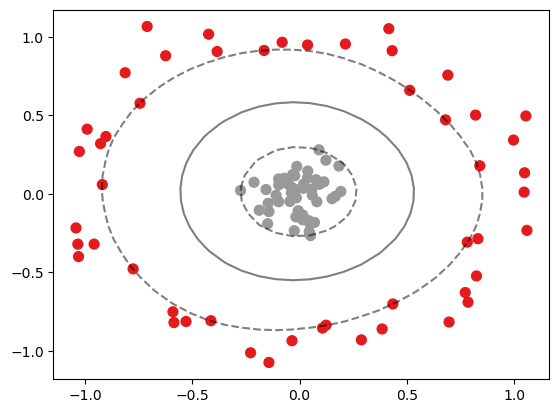

In [45]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1],
           s=300, lw=1, facecolors='none')

- Above figure: kernel SVM fit to the data

- Using kernelized support vector machine, we learn a suitable nonlinear decision boundary
- Kernel transformation strategy is used to turn fast linear methods into fast nonlinear methods

## Turning the SVM: Softening margins

- So far we have worked on a clean dataset where the perfect decision boundary exist.
- What about the data with some overlap? 

- Let's see the example

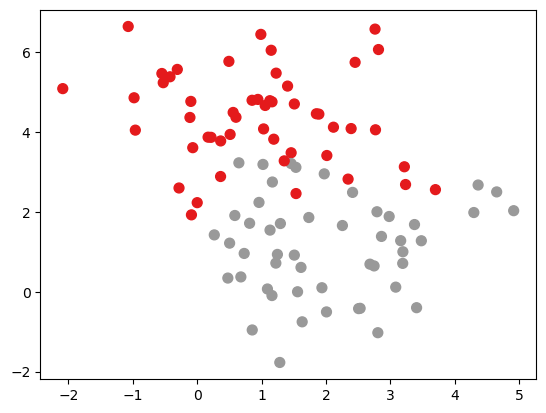

In [46]:
X, y = make_blobs(n_samples=100, centers=2, 
                 random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Set1')

- To handle such cases SVM has a bit of fudge-factor that softens the margin.
- It allows some of the points to creep into the margin if that allows a better fit.
- The hardness of the margin is controlled by a tunning parameter, known as **C**

- Let's see how changing a C parameter affects the final fit, via softening the margin

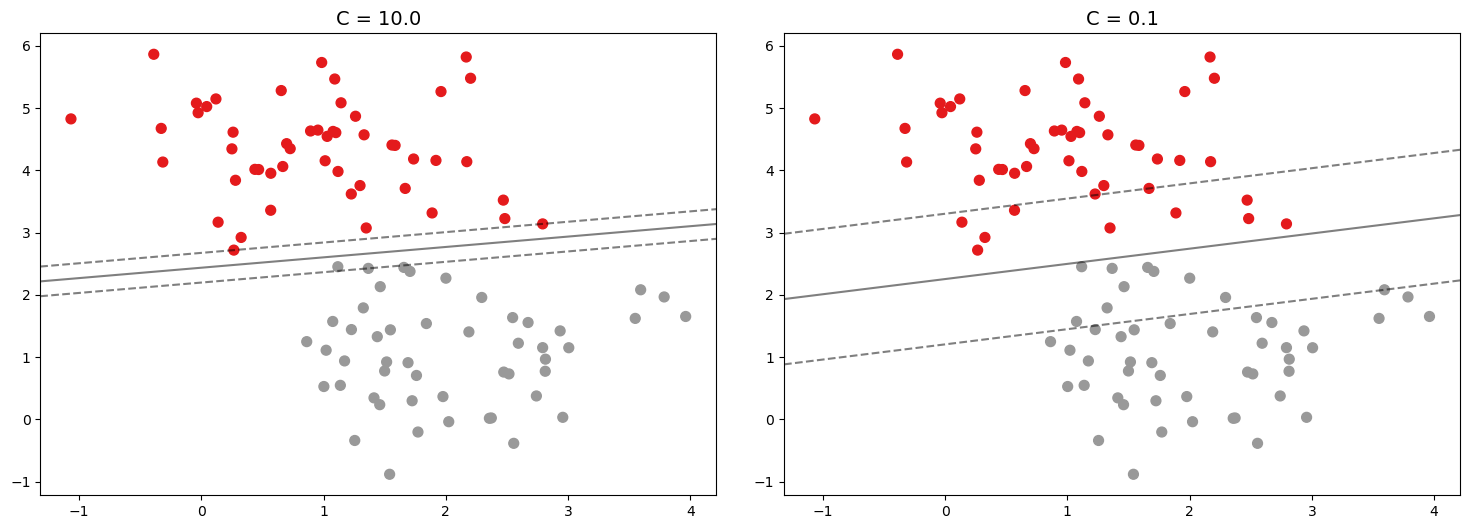

In [56]:
X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)


fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)


for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:,0], X[:, 1], c=y, s=50, cmap='Set1')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:,0],
               model.support_vectors_[:,1],
               s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)
    

- The optimal value of the C parameter will depend on your dataset and showuld be tuned via cross-validation